                                                                                               Hurgland-Nick KELIET

### Skills added :  
   >- Data Processing
   >- Scalabilité
   >- "Gradient Boosting Classifier"
   >- "XGBoost Classifier"
   >- "GridSearchCV"
   >- "RandomForestClassifier"
   >- Courbe d'apprentissage

# ---------------  Gradient Boosting Classifier : The titanic survivors  ------------------

In [1]:
# import des modules 
import pandas as pd
import numpy as np

# import visualisation
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set()

# Algorithme 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


# Ignore les avertissement
import warnings
warnings.filterwarnings('ignore')

# Data Processing

In [2]:
# Chargement des datas
train_data = pd.read_csv("C:/Users/Hurgland-Nick KELIET/Desktop/DataSets/Classification/train.csv")
test_data = pd.read_csv("C:/Users/Hurgland-Nick KELIET/Desktop/DataSets/Classification/test.csv")

In [3]:
# Quick vision à notre dataset de training
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Taille  de notre train_data
train_data.shape

(891, 12)

In [5]:
# Quick vision à notre dataset de test
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Taille  de notre train_data
test_data.shape

(418, 11)

 - On peut voir que nous avons une colonne PassengerId qui ne nous est pas utile
 - Mettons en index

In [7]:
# Selectionnons nos Feature et labels
y_train = train_data["Survived"]
train_data.drop(["Survived"], axis = 1, inplace=True)

In [8]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [9]:
train_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Créons un dataset complet
# Append va ajouter un dataset ou une portion de dataset sous un autre dataset
full_data = train_data.append(test_data)

In [11]:
full_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


On peut voir que nous avons désormais 1309 rows qui est de base : data_train = 891 + data_test = 418.
On est bien alors

In [12]:
# Selectionnons les colonnes qui ne nous sert à rien 
drop_cols = ['Name','Age','SibSp','Ticket','Cabin','Parch','Embarked']

# Effaçons maintenant les colonnes dont nous n'avons besoin
full_data.drop(drop_cols,axis = 1, inplace = True)

In [13]:
full_data.head()

,PassengerId,Pclass,Sex,Fare
0,1,3,male,7.2500
1,2,1,female,71.2833
2,3,3,female,7.9250
3,4,1,female,53.1000
4,5,3,male,8.0500


In [14]:
# Tranformond les dummies en numérique (Sex)
full_data = pd.get_dummies(full_data, columns=["Sex"])

In [15]:
full_data.head()

,PassengerId,Pclass,Fare,Sex_female,Sex_male
0,1,3,7.2500,0,1
1,2,1,71.2833,1,0
2,3,3,7.9250,1,0
3,4,1,53.1000,1,0
4,5,3,8.0500,0,1


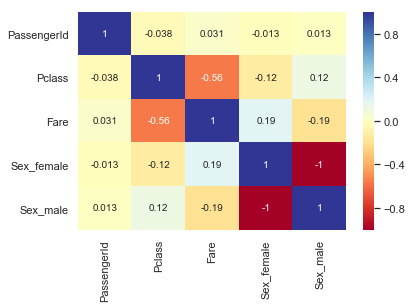

In [16]:
# Corrélations
correlation = full_data.corr()
sns.heatmap(correlation,annot = True, cmap = "RdYlBu")
plt.draw()

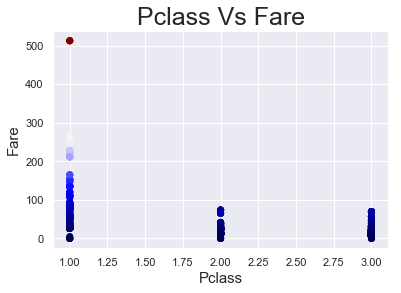

In [17]:
# Visualisons la correlation entre La classe(Pclass) et le Tarif (Fare)
plt.scatter(full_data["Pclass"],full_data["Fare"],  c = full_data["Fare"], cmap="seismic")
plt.title("Pclass Vs Fare", Fontsize = 25)
plt.xlabel("Pclass", Fontsize = 15)
plt.ylabel("Fare", Fontsize = 15)
plt.draw()

In [18]:
# visualisons les Na manquantes
full_data.isna().sum()

PassengerId    0
Pclass         0
Fare           1
Sex_female     0
Sex_male       0
dtype: int64

In [19]:
# Remplissons les cases Na
full_data.fillna(value=0.0, inplace=True)

# visualisons les Na manquantes
full_data.isna().sum()

PassengerId    0
Pclass         0
Fare           0
Sex_female     0
Sex_male       0
dtype: int64

In [20]:
# Divisons les données en Training et en testing 
X_train = full_data.values[0:891]
X_test = full_data.values[891:]

### Scalabilité

In [21]:
# Mettons nos données à l'échelle
# Instance création
scaler = MinMaxScaler()

# Mise à l'échelle des deux set
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Splitons les données
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.30, random_state = 12)

# Modèle: GradientBoostingClassifier

In [23]:
# Entraînons notre modèle
# Puis Evaluons notre modèle
larningRate_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

# Créons une boucle qui prédira avec les différents learning rate , pour savoir le meilleur
# On sait que le plus utiliser est souvent le 0.01
for learning_rate in larningRate_list:
    gb_clf = GradientBoostingClassifier(n_estimators = 20,
                                        learning_rate = learning_rate,
                                        max_features = 2, max_depth = 2, random_state = 0)
    gb_clf.fit(X_train, y_train)
    
    print("----------------------------------")
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

----------------------------------
Learning rate:  0.05
Accuracy score (training): 0.801
Accuracy score (validation): 0.731
----------------------------------
Learning rate:  0.075
Accuracy score (training): 0.814
Accuracy score (validation): 0.731
----------------------------------
Learning rate:  0.1
Accuracy score (training): 0.812
Accuracy score (validation): 0.724
----------------------------------
Learning rate:  0.25
Accuracy score (training): 0.835
Accuracy score (validation): 0.750
----------------------------------
Learning rate:  0.5
Accuracy score (training): 0.864
Accuracy score (validation): 0.772
----------------------------------
Learning rate:  0.75
Accuracy score (training): 0.875
Accuracy score (validation): 0.754
----------------------------------
Learning rate:  1
Accuracy score (training): 0.875
Accuracy score (validation): 0.739


Nous nous intéressons principalement à la précision du classificateur sur l'ensemble de validation, mais il semble qu'un taux d'apprentissage de **0,5** nous donne les meilleures performances sur l'ensemble de validation et de bonnes performances sur l'ensemble d'entraînement.

Confusion Matrix:
[[142  19]
 [ 42  65]]
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       161
           1       0.77      0.61      0.68       107

    accuracy                           0.77       268
   macro avg       0.77      0.74      0.75       268
weighted avg       0.77      0.77      0.77       268



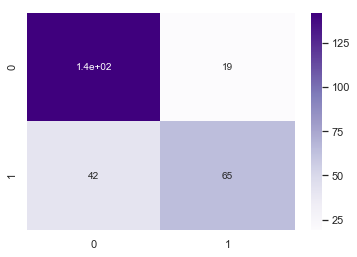

In [24]:
# Evaluons maintenant en vérifiant la précision en créant une matrice de confusion.
# " Nous gardons notre meilleur Learning rate"
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)

# Matrice de confusion
print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))
confusion_matrice = confusion_matrix(y_val, predictions)

# Classification Report
print("Classification Report")
sns.heatmap(confusion_matrice, annot=True,cmap='Purples')
print(classification_report(y_val, predictions))

# Modèle: XGBoost Classifier

In [25]:
# Import du module
#!pip install xgboost
from xgboost import XGBClassifier

In [26]:
# Appliquons notre modèle
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [27]:
score = xgb_clf.score(X_val, y_val)
print("Le score R2 =",score)

# Matrice de confusion
print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))
confusion_matrice_xgb = confusion_matrix(y_val, predictions)

Le score R2 = 0.7761194029850746
Confusion Matrix:
[[142  19]
 [ 42  65]]


La comparaison de la précision de XGboost avec la précision d'un classificateur de gradient régulier montre que, dans ce cas, les résultats étaient très similaires. Cependant, ce ne sera pas toujours le cas et dans différentes circonstances, l'un des classificateurs pourrait facilement être plus performant que l'autre. Essayez de faire varier les arguments de ce modèle pour voir en quoi le résultat diffère.

 # Modèle: GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.neighbors import KNeighborsClassifier

In [29]:
param_grid = {'n_neighbors': np.arange(1,20),
             'metric':['euclidean','manhattan'],
             'weights':['uniform','distance']}
grid = GridSearchCV(KNeighborsClassifier(),param_grid, cv = 5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
print("Best Score: ", grid.best_score_)
print("Best Params: ", grid.best_params_)
print("Best Estimator: ", grid.best_estimator_)
model =  grid.best_estimator_

Best Score:  0.812199036918138
Best Params:  {'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'uniform'}
Best Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')


In [31]:
model.score(X_val,y_val)

0.7723880597014925

# Courbe d'apprentissage
- Vérifier si la machine réussit à bien apprendre

[ 49  99 149 199 249 298 348 398 448 498]


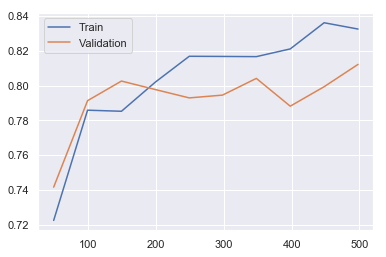

In [32]:
N, train_score, val_score = learning_curve(model,X_train,y_train, train_sizes = np.linspace(0.1,1.0,10), cv = 5)

print(N)
plt.plot(N,train_score.mean(axis = 1), label = 'Train')
plt.plot(N,val_score.mean(axis = 1), label = 'Validation')
plt.legend()

In [33]:
# Paramètre GridSearchCV 
search_param = {
    "n_estimators": [100],
    "criterion": ["gini", "entropy"],
    'max_features': [0.5, 1.0, "sqrt"],
    'max_depth': [4, 5, 6, 7, 8, None],
}

# Créons une copy de notre dataset
data = full_data

# Tentons d'utiser unn random Forest Classifier avec GridSearch pour trouver des paramètres optimales pour prédire
forest = RandomForestClassifier(random_state=0)
grid   = GridSearchCV(forest, search_param, cv=12, verbose=0)
grid.fit(X_train, y_train)

# Affichons le score et les meilleurs paramètres 
print(grid.best_score_)
print(grid.best_params_)

# -----------------------------------------------------------------------------------
# Les outputs que je garde: 
# {n_estimators = 100, criterion = 'gini', max_depth = 8, max_features = 0.5,random_state = 0}
# Je peux maintenant les placer dans RandomForestClassifier.

0.8378812199036918
{'criterion': 'gini', 'max_depth': 8, 'max_features': 0.5, 'n_estimators': 100}


R2: 0.9373996789727127
Confusion Matrix:
[[141  20]
 [ 45  62]]
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       161
           1       0.76      0.58      0.66       107

    accuracy                           0.76       268
   macro avg       0.76      0.73      0.73       268
weighted avg       0.76      0.76      0.75       268



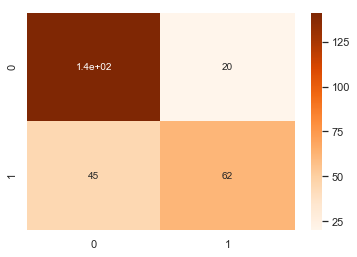

In [34]:
# Evaluons maintenant en vérifiant la précision en créant une matrice de confusion.
# " Nous gardons notre meilleur Learning rate"
RandForest_model = RandomForestClassifier(n_estimators = 100,
                                 criterion = 'gini',
                                 max_depth = 8,
                                 max_features = 0.5,
                                 random_state = 0
                                )

# Entraînons le modèle et prédisons
RandForest_model.fit(X_train, y_train)
predictions_Rf = RandForest_model.predict(X_val)

#Affichons le nouveau Score.
print("R2:",RandForest_model.score(X_train, y_train))

# Matrice de confusion
print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions_Rf))
confusion_matrice = confusion_matrix(y_val, predictions_Rf)

# Classification Report
print("Classification Report")
sns.heatmap(confusion_matrice, annot=True,cmap='Oranges')
print(classification_report(y_val, predictions_Rf))

# Conclusion

On peut voir que on obtient un grand score avec le modèle RandomForestClassifier
Il nous a fallut dégager les bon paramètres avec Grid Search.

We can see that we get a great score with the RandomForestClassifier model
We had to find the right parameters with Grid Search.

                                                                                                                FIN